#Introduction

这篇笔记是一篇简单和基础的对于集成学习方式的介绍，尤其是对于**stacking** 这种方式。

在这里，将使用nutshell作为第一层，用其他方式(xgboost)分类的结果作为第二层。

Titanc 生存预测是Kaggle上大多数新手的入门竞赛，而stacking这种方式帮助了许多队伍在数据竞赛中拿到非常好的名次，所以这篇笔记主要是填补stacking在Titanic生存预测kernal中的空缺。





**基本原理：**
![Image of KFold](https://img-blog.csdn.net/20180329162218540?watermark/2/text/aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTMzOTU1MTY=/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70)

对于每一轮的 5-fold，Model 1都要做满5次的训练和预测。

Titanic 栗子：

Train Data有890行。(请对应图中的上层部分）

每1次的fold，都会生成 713行 小train， 178行 小test。我们用Model 1来训练 713行的小train，然后预测 178行 小test。预测的结果是长度为 178 的预测值。

这样的动作走5次！ 长度为178 的预测值 X 5 = 890 预测值，刚好和Train data长度吻合。这个890预测值是Model 1产生的，我们先存着，因为，一会让它将是第二层模型的训练来源。

重点：这一步产生的预测值我们可以转成 890 X 1 （890 行，1列），记作 P1 (大写P)

接着说 Test Data 有 418 行。(请对应图中的下层部分，对对对，绿绿的那些框框）

每1次的fold，713行 小train训练出来的Model 1要去预测我们全部的Test Data（全部！因为Test Data没有加入5-fold，所以每次都是全部！）。此时，Model 1的预测结果是长度为418的预测值。

这样的动作走5次！我们可以得到一个 5 X 418 的预测值矩阵。然后我们根据行来就平均值，最后得到一个 1 X 418 的平均预测值。

重点：这一步产生的预测值我们可以转成 418 X 1 （418行，1列），记作 p1 (小写p)

走到这里，你的第一层的Model 1完成了它的使命。

第一层还会有其他Model的，比如Model 2，同样的走一遍， 我们有可以得到  890 X 1  (P2) 和  418 X 1 (p2) 列预测值。

这样吧，假设你第一层有3个模型，这样你就会得到：

来自5-fold的预测值矩阵 890 X 3，（P1，P2， P3）  和 来自Test Data预测值矩阵 418 X 3， （p1, p2, p3）。

—————————————–——————————————

到第二层了………………

来自5-fold的预测值矩阵 890 X 3 作为你的Train Data，训练第二层的模型
来自Test Data预测值矩阵 418 X 3 就是你的Test Data，用训练好的模型来预测他们


————————————————————————————

![Image of KFold](https://img-blog.csdn.net/20170828194822708?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQvTk9UX0dVWQ==/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center)




K-fold：默认采用的CV策略，主要参数包括两个，一个是样本数目，一个是k-fold要划分的份数

    fromsklearn.model_selection import KFold  
    X= np.array([[1, 2], [3, 4], [1, 2], [3, 4]])  
    y= np.array([1, 2, 3, 4])  
    kf= KFold(n_splits=2)  
    kf.get_n_splits(X)#给出K折的折数，输出为2  
    print(kf)   
    #输出为：KFold(n_splits=2, random_state=None,shuffle=False)  
    for train_index, test_index in kf.split(X):  
        print("TRAIN:",train_index, "TEST:", test_index)  
    X_train,X_test = X[train_index], X[test_index]  
    y_train,y_test = y[train_index], y[test_index]  
    #输出：TRAIN: [2 3] TEST: [0 1]  
           TRAIN: [0 1] TEST: [2 3]  

这里，kf.split(X)返回的是X中进行划分后train和test的索引值，另X中数据集的索引值为0,1,2,3；第一次划分，先选择

test，索引为0和1的数据集为test，剩下索引为2和3的数据集为train；第二次划分时，先选择test，索引为2和3的数据集为test，剩下索引为0和1的数据集为train。


Stratified k-fold：与k-fold类似，将数据集划分为k份，不同点在于，划分的k份中，每一份内各个类别数据的比例和原始数据集中各个类别的比例相同。

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131289 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.6-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.6-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.6-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [1]:
!mkdir -p drive
!google-drive-ocamlfuse -o nonempty drive
import os
os.chdir("drive")
!ls

 aclImdb_v1.tar.gz      practice	        Titanic
 data_description.txt   residual_plot.png       torchtest.ipynb
 drive		        Sales		        train.csv
 GuodongDrive	        sample_submission.csv   Untitled0.ipynb
 House		        Sense1.ipynb	        XGboost_practice1.ipynb
'House price'	        Sense2.ipynb（副本）    XGboost_practice2.ipynb
 Houseprice.ipynb       Sense.ipynb	        剑指offer
 huawei		        sensePY.ipynb	        数组和链表.desktop
 labeledTrainData.tsv   submission.csv	        糖尿病数据.txt
'movie review'	        test.csv
 neg		        testData.tsv


In [2]:
os.chdir("Titanic")
!ls

StackingSubmission.csv	test.ipynb     train.csv
test.csv		Titanic.ipynb  集成学习（ensembling_stacking）.ipynb


In [3]:
#导入libraries
import pandas as pd
import numpy as np
import re
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')



**我们准备用5个模型作为base model进行stacking**

In [0]:
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier,
                              GradientBoostingClassifier,
                             ExtraTreesClassifier)
from sklearn.svm import SVC
#from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold

一个需要注意一下的小点：原kernal中导入KFold是用的 sklearn.cross_validation，但是再sklearn 0.18及以上版本中，这个包被放弃，用model——selection代替

#特征处理

如大多数kernal结构一样，我们先进行特征处理，来探索可能的有用特征以及可以分类特征（categorical features）

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#先保存一下乘客ID 以便进行预处理
PassengerId = test['PassengerId']
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


我们要从这些分类变量中提取出有用信息

作者主要参考了[Sina的特征处理kernal](https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier)

In [0]:
full_data = [train,test]
#将名字的长度添加进train
train['Name_length'] = train['Name'].apply(len)
test['Name_length'] = test['Name'].apply(len)

#将乘客是否具有仓位作为一个特征，这样就将原来的float变成了0,1特征
train['Has_Cabin'] = train["Cabin"].apply(lambda x:0 if type(x) == float else 1)
test['Has_Cabin'] = test["Cabin"].apply(lambda x:0 if type(x) == float else 1)

#将SibSp 和 Parch 添加为新特征 FamlySize
for dataset in full_data:
  dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] +1
  
#从刚才建立的FamilySize 提取新特征 IsAlone
for dataset in full_data:
  dataset['IsAlone'] = 0
  dataset.loc[dataset['FamilySize']==1,'IsAlone'] = 1
  
#移除Embarked中的所有Nulls
for dataset in full_data:
  dataset['Embarked'] = dataset['Embarked'].fillna('S')

#移除Fare中的所有Nulls，创建新特征CategoricalFare
for dataset in full_data:
  dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
train['CategoricalFare'] = pd.qcut(train['Fare'],4)

#创建新的特征CategoricalAge,随机生成age区间的随机数，类似于正态化
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
train['CategoricalAge'] = pd.cut(train['Age'],5)

#建立函数来从姓名中提取title
def get_title(name):
  title_search = re.search('([A-Za-z]+)\.',name)
  if title_search:
    return title_search.group(1)
  return ""

#建立新的特征Title
for dataset in full_data:
  dataset['Title'] = dataset['Name'].apply(get_title)
  
#将所有的不常见的title归属于（group）Rare
for dataset in full_data:
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess',
                                               'Capt', 'Col','Don', 'Dr', 'Major',
                                               'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
  
#mapping sex
for dataset in full_data:
  dataset['Sex'] = dataset['Sex'].map({'female':0,'male':1}).astype(int)
#mapping titles
  title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
  dataset['Title'] = dataset['Title'].map(title_mapping)
  dataset['Title'] = dataset['Title'].fillna(0)
#mapping Embarked
  dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
#mapping Fare
  dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
  dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
  dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
  dataset['Fare'] = dataset['Fare'].astype(int)
#mapping Age
  dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
  dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 ;

In [0]:
# Feature selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)
test  = test.drop(drop_elements, axis = 1)

***特征处理完毕***

在我们将他们放进机器学习模型之前，我们先进行简单的特征分析

In [8]:
train.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Name_length,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,23,0,2,0,1
1,1,1,0,2,0,3,1,51,1,2,0,3
2,1,3,0,1,0,1,0,22,0,1,1,2
3,1,1,0,2,0,3,0,44,1,2,0,3
4,0,3,1,2,0,1,0,24,0,1,1,1


我们先用热力图进行特征的相关性分析

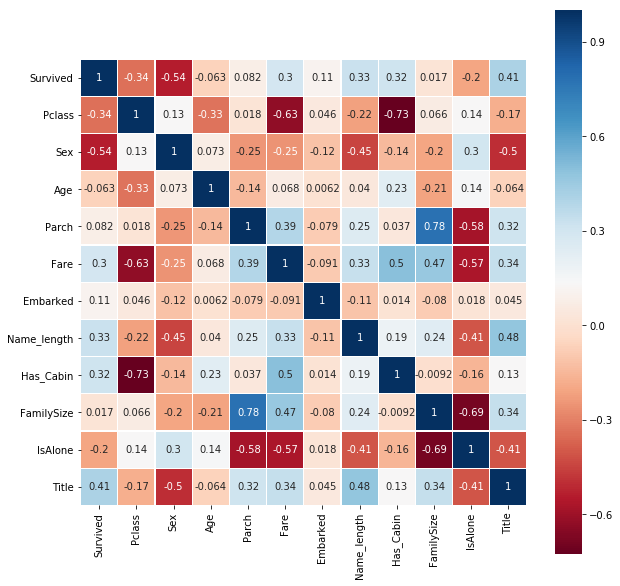

In [9]:
colormap = plt.cm.RdBu
plt.figure(figsize = (10,10))
sns.heatmap(train.astype(float).corr(),linewidths = 0.1,vmax = 1.0,square = True,linecolor = 'white',cmap = colormap,annot = True)

从相关性图像中我们可以看到这些特征相关性并不强，所以构建的这些特征还是相当有效的。

#开始进行stacking

In [0]:
#一些一会将要用到的比较有用的参数
ntrain = train.shape[0]
ntest = test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(5,random_state=SEED)

In [0]:
class SklearnHelper(object):
  def __init__(self,clf,seed = 0,params = None):
    
    params['random_state'] = seed
    self.clf = clf(**params)

  def train(self, x_train, y_train):
      self.clf.fit(x_train, y_train)

  def predict(self, x):
      return self.clf.predict(x)

  def fit(self,x,y):
      return self.clf.fit(x,y)

  def feature_importances(self,x,y):
      print(self.clf.fit(x,y).feature_importances_)
    

上述代码很多人都知道，我们写在这里的原因是为了在接下来要用的时候防止一遍又一遍的重新写这些代码

#stacking
stacking的第二层（level）将用第一层分类器的输出结果作为第二层的特征,但是，在这里我们不能直接将train，test用于第一层的模型中来得到结果，这样就相当于你第一层的模型已经见过test了，所以这样在第二层就会引起overfitting

In [0]:
#Out-of-Fold Predictions
#X = np.array([1,1,1,1,1], [2,2,2,2,2], [3,3,3,3,3], [4,4,4,4,4],[5,5,5,5,5]])
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))
    ##一个用随机值填充的5*418的矩阵，用来存放5次交叉后的预测结果

    for i,(train_index, test_index) in enumerate(kf.split(train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

    这个函数是用于交叉实验的
    clf是选择的分类模型，x_train是所有训练集，y_train是所有训练集样本的类别标签，x_test是给定的所有测试集
    def get_oof(clf, x_train, y_train, x_test):
        oof_train = np.zeros((ntrain,))#长度为891的全0array
        oof_test = np.zeros((ntest,))#长度为418的全0array
        oof_test_skf = np.empty((NFOLDS, ntest))#一个用随机值填充的5*418的矩阵，用来存放5次交叉后的预测结果
        for i, (train_index, test_index) in enumerate(kf):
            #5次交叉，5次循环
            #kf实际上是一个迭代器，是从891个样本中分成了5组训练集和测试集的索引号
            x_tr = x_train[train_index]#当前循环，当前实验的训练数据
            y_tr = y_train[train_index]#当前循环的训练数据标签
            x_te = x_train[test_index]#d当前循环的测试数据
            clf.train(x_tr, y_tr)#用模型去拟合数据，也就是训练预测模型
            oof_train[test_index] = clf.predict(x_te)#把测试数据的预测标签按照对应索引，放到oof_train对应索引处
            oof_test_skf[i, :] = clf.predict(x_test)#用当前的模型，预测所有测试数据的标签，并放到oof_test_skf的一行中

        #5次实验做完，把5次得到的结果求平均
        oof_test[:] = oof_test_skf.mean(axis=0)
        return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)





第一层模型构建：


    1.Random Forest classifier
   
    2.Extra Trees classifier  

    3.AdaBoost classifer    

    4.Gradient Boosting classifer    
 
    5.Support Vector Machine 





一些参数介绍：

n_jobs: 所用到的核心数，如果设置为-1，那么所有的cpu都将用到

n_estimators：在学习模型中所用到的分类树

verbose:你是否想在训练中输出预测文本

In [0]:
#Random Forest参数
rf_params = {
        'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}
# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }

**借助与我们之前建立的sklearnhelper将参数放入模型**

In [0]:
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)

第一层模型构建完毕，我们接下来要构建Numpy arrays输出

In [0]:
# Create Numpy arrays of train, test and target ( Survived) dataframes to feed into our models
y_train = train['Survived'].ravel()
train = train.drop(['Survived'], axis=1)
x_train = train.values # Creates an array of the train data
x_test = test.values # Creats an array of the test data

#第一层模型输出

In [16]:
et_oof_train, et_oof_test = get_oof(et, x_train, y_train, x_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,x_train, y_train, x_test) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc,x_train, y_train, x_test) # Support Vector Classifier

print("Training is complete")

Training is complete


现在我们已经完成了第一层的训练，接下来我们俩看一下这些特征和输出结果之间的重要性关系

In [17]:
rf_feature = rf.feature_importances(x_train,y_train)
et_feature = et.feature_importances(x_train, y_train)
ada_feature = ada.feature_importances(x_train, y_train)
gb_feature = gb.feature_importances(x_train,y_train)

[0.1256494  0.19916713 0.03073316 0.02115519 0.07225914 0.02383111
 0.10900366 0.06509027 0.06648568 0.01322553 0.27339973]
[0.12162734 0.38426061 0.03055973 0.01723541 0.05648914 0.02743563
 0.04500001 0.08400235 0.04265023 0.02231422 0.16842534]
[0.028 0.014 0.022 0.066 0.038 0.008 0.69  0.012 0.05  0.004 0.068]
[0.08594548 0.01117869 0.04854046 0.01473892 0.05238764 0.02493238
 0.17257101 0.03728407 0.11149595 0.00667246 0.43425295]


作者使用了较为麻烦的方法保存这些权重,并且用的完全不同的的权重，与结果中得到的数据完全不同

In [0]:
x_train = np.concatenate(( et_oof_train, rf_oof_train, ada_oof_train, gb_oof_train, svc_oof_train), axis=1)
x_test = np.concatenate(( et_oof_test, rf_oof_test, ada_oof_test, gb_oof_test, svc_oof_test), axis=1)

配置xgboost参数

In [0]:
gbm = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(x_train, y_train)
predictions = gbm.predict(x_test)

保存预测结果

In [0]:
StackingSubmission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': predictions })
StackingSubmission.to_csv("StackingSubmission.csv", index=False)

——

[Kaggle 原文参考链接](https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier)